## Decision tree

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
# Decision Tree
from sklearn import tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import time

start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)

x_traincv=cv.fit_transform(x_train)

z=x_traincv.toarray()

z

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_

cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 

X

metode = tree.DecisionTreeClassifier(random_state=2)

y_train=y_train.astype('int')

metode.fit(x_traincv1,y_train)

x_testcv1=cv1.transform(x_test)
pred=metode.predict(x_testcv1)
actu=np.array(y_test).astype(None)
count=0

for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1

count

len(actu)

akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

print("------kategori,jumlah-----")
print(y_test.value_counts())

print("------Confusion matrix-----")

# menghitung akurasi
print("------Perbandingan akurasi precision,recall,f1-score-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(actu, pred, target_names=target_names))

# menghtiung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))


-----average accuracy-----
81.0810810811
------kategori,jumlah-----
0    45
1    40
5    35
4    34
3    34
2    34
Name: label, dtype: int64
------Confusion matrix-----
------Perbandingan akurasi precision,recall,f1-score-----
             precision    recall  f1-score   support

    class 0       0.82      0.69      0.75        45
    class 1       0.84      0.80      0.82        40
    class 2       0.91      0.91      0.91        34
    class 3       0.89      0.91      0.90        34
    class 4       0.65      0.82      0.73        34
    class 5       0.79      0.77      0.78        35

avg / total       0.82      0.81      0.81       222

------Running Time-----
--- 0.824000120163 seconds ---


## KNN

-----average accuracy-----
77.027027027
------kategori,jumlah-----
0    45
1    40
5    35
4    34
3    34
2    34
Name: label, dtype: int64
------Confusion matrix-----
col_0   0   1   2   3   4   5
label                        
0      37   3   3   0   1   1
1       3  29   4   2   0   2
2       1   1  31   0   0   1
3       6   3   0  24   1   0
4       1   3   4   3  21   2
5       2   1   2   0   1  29


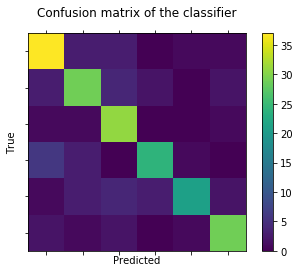

-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----
             precision    recall  f1-score   support

    class 0       0.74      0.82      0.78        45
    class 1       0.72      0.72      0.73        40
    class 2       0.70      0.91      0.79        34
    class 3       0.83      0.71      0.76        34
    class 4       0.88      0.62      0.72        34
    class 5       0.83      0.83      0.83        35

avg / total       0.78      0.77      0.77       222

------Running Time-----
--- 0.980999946594 seconds ---


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
#KNN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)

x_traincv=cv.fit_transform(x_train)

z=x_traincv.toarray()

z

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_
cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 
metode = KNeighborsClassifier(n_neighbors=30)

y_train=y_train.astype('int')

metode.fit(x_traincv1,y_train)

x_testcv1=cv1.transform(x_test)
pred=metode.predict(x_testcv1)
actu=np.array(y_test).astype(None)
count=0

for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1

count

len(actu)

akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

# display confusion_matrix
# print(metrics.accuracy_score(y_test, pred))
print("------kategori,jumlah-----")
print(y_test.value_counts())
print("------Confusion matrix-----")
# print(metrics.confusion_matrix(y_test, pred))
cnf_matrix = pd.crosstab(y_test, pred)
print(cnf_matrix)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# menghitung akurasi
print("-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(actu, pred, target_names=target_names))

# menghtiung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))


## MNB

<class 'pandas.core.series.Series'>
  (0, 1374)	0.394680136573
  (0, 244)	0.270472610722
  (0, 3666)	0.273870124373
  (0, 1248)	0.306604201511
  (0, 2622)	0.204558529082
  (0, 971)	0.748476441456
  (1, 2622)	0.0980746828091
  (1, 3184)	0.134587938137
  (1, 1087)	0.305816258235
  (1, 118)	0.28581285356
  (1, 1504)	0.184608459284
  (1, 116)	0.142346489116
  (1, 1751)	0.445797747358
  (1, 1078)	0.278021476789
  (1, 2859)	0.406019237569
  (1, 2199)	0.250030416656
  (1, 1217)	0.135570998453
  (1, 2348)	0.308995572842
  (1, 2256)	0.340452562782
  (1, 2441)	0.097713639987
  (2, 244)	0.167448949866
  (2, 1217)	0.175059873255
  (2, 2897)	0.225937786117
  (2, 731)	0.252570738081
  (2, 1633)	0.206219881901
  :	:
  (1996, 1467)	0.271853763565
  (1996, 134)	0.306468142212
  (1997, 244)	0.0948786731164
  (1997, 1248)	0.107553218544
  (1997, 3184)	0.0984718572663
  (1997, 1000)	0.280138593567
  (1997, 1640)	0.0706098771072
  (1997, 1686)	0.0996794287837
  (1997, 1103)	0.318348016769
  (1997, 3442)	0.

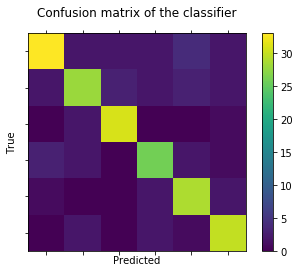

-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----
             precision    recall  f1-score   support

    class 0       0.85      0.73      0.79        45
    class 1       0.78      0.70      0.74        40
    class 2       0.86      0.91      0.89        34
    class 3       0.76      0.76      0.76        34
    class 4       0.74      0.85      0.79        34
    class 5       0.79      0.86      0.82        35

avg / total       0.80      0.80      0.80       222

------Running Time-----
--- 0.72200012207 seconds ---


In [12]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
import time

start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)
print(type(x_train))

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_
cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
print(x_traincv1)

a=x_traincv1.toarray() 
metode = MultinomialNB(alpha=0.1)

y_train=y_train.astype('int')
metode.fit(x_traincv1,y_train)
x_testcv1=cv1.transform(x_test)

pred=metode.predict(x_testcv1)
actu=np.array(y_test).astype(None)
count=0
for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1

print(count)
akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

print("------kategori,jumlah-----")
print(y_test.value_counts())
print("------Confusion matrix-----")
cnf_matrix = pd.crosstab(y_test, pred)
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# menghitung akurasi
print("-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(actu, pred, target_names=target_names))
# menghtiung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))


## Neural Networks

-----average accuracy-----
76.1261261261
------kategori,jumlah-----
0    45
1    40
5    35
4    34
3    34
2    34
Name: label, dtype: int64
------Confusion matrix-----
col_0   0   1   2   3   4   5
label                        
0      36   1   2   1   3   2
1       4  26   3   5   0   2
2       1   1  30   0   0   2
3       1   4   0  25   4   0
4       1   1   0   4  24   4
5       2   0   0   1   4  28


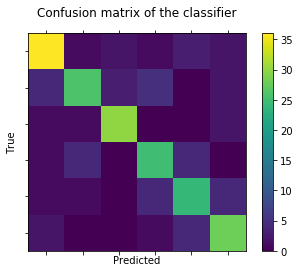

-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----
             precision    recall  f1-score   support

    class 0       0.80      0.80      0.80        45
    class 1       0.79      0.65      0.71        40
    class 2       0.86      0.88      0.87        34
    class 3       0.69      0.74      0.71        34
    class 4       0.69      0.71      0.70        34
    class 5       0.74      0.80      0.77        35

avg / total       0.76      0.76      0.76       222

------Running Time-----
--- 10.6809999943 seconds ---


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
#Neural Network Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

import time

start_time = time.time()

df=pd.read_csv('data/CleanDatasetStopwordStemmer.csv',sep=',', header=0,names=['id','label','tweet',],encoding="ISO-8859-1")

df.loc[df["label"]=='terlambat',"label"]=0
df.loc[df["label"]=='sistem',"label"]=1
df.loc[df["label"]=='gagal',"label"]=2
df.loc[df["label"]=='jaminan',"label"]=3
df.loc[df["label"]=='pelayanan',"label"]=4
df.loc[df["label"]=='respon',"label"]=5

df_x=df["tweet"]
df_y=df["label"]

cv=CountVectorizer()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1,random_state=10)

x_traincv=cv.fit_transform(x_train)


z=x_traincv.toarray()

z

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(df_x)
idf = vectorizer._tfidf.idf_

cv1=TfidfVectorizer(min_df=1,stop_words=[""])
x_traincv1 = cv1.fit_transform(x_train)
a=x_traincv1.toarray() 

X

metode = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

y_train=y_train.astype('int')

metode.fit(x_traincv1,y_train)

x_testcv1=cv1.transform(x_test)
pred=metode.predict(x_testcv1)
actu=np.array(y_test).astype(None)
count=0

for i in range (len(pred)):
    if pred[i]==actu[i]:
        count=count +1

count

len(actu)

akurasi=count/222.0*100
print("-----average accuracy-----")
print (akurasi)

print("------kategori,jumlah-----")
print(y_test.value_counts())
print("------Confusion matrix-----")
cnf_matrix = pd.crosstab(y_test, pred)
print(cnf_matrix)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# menghitung akurasi
print("-----!!!Perbandingan akurasi precision,recall,f1-score!!!-----")
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(actu, pred, target_names=target_names))

# menghtiung time
print("------Running Time-----")
print("--- %s seconds ---" % (time.time() - start_time))
